## Instalação e download de dados

In [1]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 914.7 kB/s eta 0:00:00


In [2]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


tf.random.set_seed(42)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
!gdown 1iZDFEefN0J2wao1QRIAuT-ukp0coX0Rp
!gdown 1_lY6ydxyDA9-HNrYleq4UrL-JKcKLM7c
!gdown 1C1ZHPeYF71NVVOkZD6cW5SmzV9Uui4QK
!gdown 1Lbayox3-fo92nLSvk1MPbai5ek0Noqi3

Downloading...
From: https://drive.google.com/uc?id=1iZDFEefN0J2wao1QRIAuT-ukp0coX0Rp
To: /content/DADOS_PROCESSADOS.csv
100% 103M/103M [00:00<00:00, 202MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_lY6ydxyDA9-HNrYleq4UrL-JKcKLM7c
To: /content/DADOS_PROCESSADOS2.csv
100% 38.5M/38.5M [00:00<00:00, 39.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1C1ZHPeYF71NVVOkZD6cW5SmzV9Uui4QK
From (redirected): https://drive.google.com/uc?id=1C1ZHPeYF71NVVOkZD6cW5SmzV9Uui4QK&confirm=t&uuid=d93bdab3-bf8d-4faa-ac8d-0ad31a8a49c1
To: /content/DADOS_PROCESSADOS (1).csv
100% 110M/110M [00:01<00:00, 90.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Lbayox3-fo92nLSvk1MPbai5ek0Noqi3
From (redirected): https://drive.google.com/uc?id=1Lbayox3-fo92nLSvk1MPbai5ek0Noqi3&confirm=t&uuid=8a9484c3-729c-44ef-a6b2-86414f41218d
To: /content/DADOS_PROCESSADOS_COMPLETOS.csv
100% 295M/295M [00:02<00:00, 123MB/s]


In [5]:
df = pd.read_csv('/content/DADOS_PROCESSADOS (1).csv', delimiter=',')
df

,FRAUDADOR,QUADRANT_1,QUADRANT_2,QUADRANT_3,QUADRANT_4,MES_1,MES_2,MES_3,MES_4,MES_5,...,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL
0,0,1,0,0,0,-0.3,-0.272727,-0.2,-0.3,-0.6,...,-0.454545,-0.272727,-0.3,-0.4,0.0,0.0,0,0,0,1
1,0,0,0,1,0,0.5,-0.363636,-0.1,-0.3,0.3,...,0.545455,0.909091,0.0,-0.5,-0.6,2.1,1,0,0,0
2,0,0,0,1,0,-0.6,-0.727273,-0.7,-0.7,-0.8,...,-0.363636,-0.363636,-0.5,-0.4,-0.5,-0.5,1,0,0,0
3,0,0,0,1,0,0.1,2.000000,3.8,0.0,7.5,...,0.090909,0.454545,0.2,0.5,0.5,1.3,1,0,0,0
4,0,0,0,1,0,1.0,0.909091,1.3,1.6,1.4,...,1.454545,2.181818,1.6,1.7,2.3,2.1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283530,1,1,0,0,0,0.3,0.181818,0.3,-0.2,-0.2,...,-0.090909,-0.090909,0.0,0.1,0.1,0.1,0,0,0,1
283531,1,0,0,1,0,-0.6,-0.636364,-0.6,-0.7,-0.7,...,-0.727273,-0.727273,-0.7,-0.8,-0.8,-0.8,0,0,0,1
283532,1,1,0,0,0,-0.4,-0.454545,-0.4,-0.5,-0.5,...,-0.181818,-0.181818,-0.1,-0.5,-0.5,-0.5,0,0,0,1
283533,1,1,0,0,0,0.1,0.000000,0.1,0.3,0.3,...,-0.181818,-0.181818,-0.1,-0.2,-0.2,-0.2,0,0,0,1


In [18]:
df_ext = pd.read_csv('/content/DADOS_PROCESSADOS_COMPLETOS.csv', delimiter=',')
df_ext

,MATRICULA,CONS_MEDIDO,ANOMES,COD_LATITUDE,COD_LONGITUDE,ECO_INDUSTRIAL,ECO_COMERCIAL,ECO_PUBLICA,ECO_OUTRAS,COD_GRUPO,...,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL
0,-1.489078,-0.083333,2021-09-01,-0.625539,0.259874,0.0,0.0,0.0,0.0,-0.6,...,-0.153846,0.000000,-0.083333,-0.166667,0.166667,0.181818,0.0,0.0,0.0,0.0
1,-1.345288,0.416667,2021-09-01,0.346773,0.333128,0.0,1.0,0.0,0.0,-0.9,...,0.692308,1.083333,0.166667,-0.250000,-0.333333,2.090909,1.0,0.0,0.0,-1.0
2,-1.345284,-0.666667,2021-09-01,0.346565,0.331747,0.0,1.0,0.0,0.0,-0.9,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,1.0,0.0,0.0,-1.0
3,-1.345280,-0.416667,2021-07-01,0.345588,0.324977,0.0,1.0,0.0,0.0,-0.9,...,-0.384615,-0.333333,-0.666667,-0.583333,-0.583333,0.000000,1.0,0.0,0.0,-1.0
4,-1.345279,2.833333,2021-09-01,0.345211,0.322410,0.0,0.0,0.0,0.0,-0.9,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367252,0.398192,1.250000,2023-08-01,0.439539,-0.863894,0.0,0.0,0.0,0.0,0.2,...,2.538462,2.750000,2.750000,-0.583333,-0.583333,-0.636364,0.0,0.0,0.0,0.0
367253,0.398866,-0.666667,2024-02-01,-0.357309,-0.797934,0.0,0.0,0.0,0.0,0.2,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,0.0,0.0,0.0,0.0
367254,0.399454,-0.666667,2023-08-01,-0.384138,-0.880211,0.0,0.0,0.0,0.0,-0.2,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,0.0,0.0,0.0,0.0
367255,0.399985,-0.666667,2023-08-01,-0.980504,-0.012669,0.0,0.0,0.0,0.0,-0.5,...,-0.538462,-0.583333,-0.583333,-0.500000,-0.500000,-0.545455,0.0,0.0,0.0,0.0


Os dados utilizados no modelo apresentado a seguir foram selecionados com base nos insights obtidos durante a análise exploratória. Decidimos focar em três variáveis principais: consumo, localização e categoria. Essa escolha foi motivada pelo nosso objetivo de avaliar se essas variáveis isoladas seriam suficientes para que o modelo compreendesse os padrões de consumo e comportamento dos clientes da Aegea.

Os resultados preliminares indicaram que o modelo foi capaz de alcançar uma performance razoável utilizando apenas essas três variáveis. No entanto, durante a apresentação, nosso parceiro de projeto expressou preocupação com a limitação imposta pela utilização de apenas três variáveis. Reconhecemos a validade dessa observação e, embora tenhamos decidido manter a abordagem inicial para fins comparativos, planejamos incorporar outras variáveis em etapas subsequentes para aprimorar o desenvolvimento do modelo.

In [19]:
df.columns

Index(['FRAUDADOR', 'QUADRANT_1', 'QUADRANT_2', 'QUADRANT_3', 'QUADRANT_4',
       'MES_1', 'MES_2', 'MES_3', 'MES_4', 'MES_5', 'MES_6', 'MES_7', 'MES_8',
       'MES_9', 'MES_10', 'MES_11', 'MES_12', 'MES_13', 'MES_14', 'MES_15',
       'MES_16', 'MES_17', 'MES_18', 'MES_19', 'MES_20', 'MES_21', 'MES_22',
       'MES_23', 'MES_24', 'MES_25', 'MES_26', 'MES_27', 'MES_28', 'MES_29',
       'MES_30', 'MES_31', 'MES_32', 'MES_33', 'MES_34', 'MES_35', 'MES_36',
       'CATEGORIA_COMERCIAL', 'CATEGORIA_INDUSTRIAL', 'CATEGORIA_PUBLICA',
       'CATEGORIA_RESIDENCIAL'],
      dtype='object')

In [20]:
df_ext.columns

Index(['MATRICULA', 'CONS_MEDIDO', 'ANOMES', 'COD_LATITUDE', 'COD_LONGITUDE',
       'ECO_INDUSTRIAL', 'ECO_COMERCIAL', 'ECO_PUBLICA', 'ECO_OUTRAS',
       'COD_GRUPO', 'COD_SETOR_COMERCIAL', 'COD_SETOR_COMERCIAL.1',
       'NUM_QUADRA', 'COD_ROTA_LEITURA', 'FRAUDADOR', 'CONTAGEM_MATRICULA',
       'CLUSTER', 'QUADRANT_1', 'QUADRANT_2', 'QUADRANT_3', 'QUADRANT_4',
       'MES_1', 'MES_2', 'MES_3', 'MES_4', 'MES_5', 'MES_6', 'MES_7', 'MES_8',
       'MES_9', 'MES_10', 'MES_11', 'MES_12', 'MES_13', 'MES_14', 'MES_15',
       'MES_16', 'MES_17', 'MES_18', 'MES_19', 'MES_20', 'MES_21', 'MES_22',
       'MES_23', 'MES_24', 'MES_25', 'MES_26', 'MES_27', 'MES_28', 'MES_29',
       'MES_30', 'MES_31', 'MES_32', 'MES_33', 'MES_34', 'MES_35', 'MES_36',
       'CATEGORIA_COMERCIAL', 'CATEGORIA_INDUSTRIAL', 'CATEGORIA_PUBLICA',
       'CATEGORIA_RESIDENCIAL'],
      dtype='object')

In [21]:
df_ext = df_ext.drop(columns=['MATRICULA', 'CONS_MEDIDO', 'ANOMES', 'COD_LATITUDE', 'COD_LONGITUDE', 'CLUSTER', 'CONTAGEM_MATRICULA'])

Aqui, dividimos a coluna target das outras colunas utilizadas como features do moddelo.

In [22]:
X = df.drop(columns=['FRAUDADOR'])
y = df['FRAUDADOR']
X

,QUADRANT_1,QUADRANT_2,QUADRANT_3,QUADRANT_4,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,...,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL
0,1,0,0,0,-0.3,-0.272727,-0.2,-0.3,-0.6,-0.272727,...,-0.454545,-0.272727,-0.3,-0.4,0.0,0.0,0,0,0,1
1,0,0,1,0,0.5,-0.363636,-0.1,-0.3,0.3,-0.181818,...,0.545455,0.909091,0.0,-0.5,-0.6,2.1,1,0,0,0
2,0,0,1,0,-0.6,-0.727273,-0.7,-0.7,-0.8,-0.636364,...,-0.363636,-0.363636,-0.5,-0.4,-0.5,-0.5,1,0,0,0
3,0,0,1,0,0.1,2.000000,3.8,0.0,7.5,0.363636,...,0.090909,0.454545,0.2,0.5,0.5,1.3,1,0,0,0
4,0,0,1,0,1.0,0.909091,1.3,1.6,1.4,1.181818,...,1.454545,2.181818,1.6,1.7,2.3,2.1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283530,1,0,0,0,0.3,0.181818,0.3,-0.2,-0.2,-0.181818,...,-0.090909,-0.090909,0.0,0.1,0.1,0.1,0,0,0,1
283531,0,0,1,0,-0.6,-0.636364,-0.6,-0.7,-0.7,-0.636364,...,-0.727273,-0.727273,-0.7,-0.8,-0.8,-0.8,0,0,0,1
283532,1,0,0,0,-0.4,-0.454545,-0.4,-0.5,-0.5,-0.454545,...,-0.181818,-0.181818,-0.1,-0.5,-0.5,-0.5,0,0,0,1
283533,1,0,0,0,0.1,0.000000,0.1,0.3,0.3,0.272727,...,-0.181818,-0.181818,-0.1,-0.2,-0.2,-0.2,0,0,0,1


In [23]:
X_ext = df_ext.drop(columns=['FRAUDADOR'])
y_ext = df_ext['FRAUDADOR']
X_ext

,ECO_INDUSTRIAL,ECO_COMERCIAL,ECO_PUBLICA,ECO_OUTRAS,COD_GRUPO,COD_SETOR_COMERCIAL,COD_SETOR_COMERCIAL.1,NUM_QUADRA,COD_ROTA_LEITURA,QUADRANT_1,...,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL
0,0.0,0.0,0.0,0.0,-0.6,0.64,0.64,0.014815,1.454545,0.0,...,-0.153846,0.000000,-0.083333,-0.166667,0.166667,0.181818,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,-0.9,-1.02,-1.02,-0.666667,-1.000000,-1.0,...,0.692308,1.083333,0.166667,-0.250000,-0.333333,2.090909,1.0,0.0,0.0,-1.0
2,0.0,1.0,0.0,0.0,-0.9,-1.02,-1.02,-0.666667,-1.000000,-1.0,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,1.0,0.0,0.0,-1.0
3,0.0,1.0,0.0,0.0,-0.9,-1.02,-1.02,-0.666667,-1.000000,-1.0,...,-0.384615,-0.333333,-0.666667,-0.583333,-0.583333,0.000000,1.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,-0.9,-1.02,-1.02,-0.666667,-1.000000,-1.0,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367252,0.0,0.0,0.0,0.0,0.2,0.34,0.34,0.044444,0.409091,0.0,...,2.538462,2.750000,2.750000,-0.583333,-0.583333,-0.636364,0.0,0.0,0.0,0.0
367253,0.0,0.0,0.0,0.0,0.2,0.42,0.42,-0.677778,-0.545455,0.0,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,0.0,0.0,0.0,0.0
367254,0.0,0.0,0.0,0.0,-0.2,0.44,0.44,1.829630,1.227273,0.0,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,0.0,0.0,0.0,0.0
367255,0.0,0.0,0.0,0.0,-0.5,0.80,0.80,0.311111,0.772727,0.0,...,-0.538462,-0.583333,-0.583333,-0.500000,-0.500000,-0.545455,0.0,0.0,0.0,0.0


In [24]:
import pandas as pd

# Supondo que df seja o seu DataFrame original
colunas_fixas = ['FRAUDADOR', 'QUADRANT_1', 'QUADRANT_2', 'QUADRANT_3', 'QUADRANT_4',
                 'CATEGORIA_COMERCIAL', 'CATEGORIA_INDUSTRIAL', 'CATEGORIA_PUBLICA', 'CATEGORIA_RESIDENCIAL']

# Aplicar o melt para transformar os meses em linhas
df_melted = pd.melt(df, id_vars=colunas_fixas,
                    value_vars=[f'MES_{i}' for i in range(1, 37)],
                    var_name='mes', value_name='consumo')

# Criar uma nova coluna de sequência temporal baseada nos meses
df_melted['mes'] = df_melted['mes'].str.extract('(\d+)').astype(int)

# Ordenar os dados por quadrante e mês para garantir a sequência correta
df_melted = df_melted.sort_values(by=colunas_fixas + ['mes'])

print(df_melted.head())

       FRAUDADOR  QUADRANT_1  QUADRANT_2  QUADRANT_3  QUADRANT_4  \
37908          0           0           0           0           1   
39044          0           0           0           0           1   
39046          0           0           0           0           1   
39476          0           0           0           0           1   
39495          0           0           0           0           1   

       CATEGORIA_COMERCIAL  CATEGORIA_INDUSTRIAL  CATEGORIA_PUBLICA  \
37908                    0                     0                  0   
39044                    0                     0                  0   
39046                    0                     0                  0   
39476                    0                     0                  0   
39495                    0                     0                  0   

       CATEGORIA_RESIDENCIAL  mes  consumo  
37908                      1    1      1.5  
39044                      1    1     -0.4  
39046                      1 

In [25]:
df_melted

,FRAUDADOR,QUADRANT_1,QUADRANT_2,QUADRANT_3,QUADRANT_4,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL,mes,consumo
37908,0,0,0,0,1,0,0,0,1,1,1.5
39044,0,0,0,0,1,0,0,0,1,1,-0.4
39046,0,0,0,0,1,0,0,0,1,1,-0.3
39476,0,0,0,0,1,0,0,0,1,1,0.4
39495,0,0,0,0,1,0,0,0,1,1,0.2
...,...,...,...,...,...,...,...,...,...,...,...
10207097,1,1,0,0,0,1,0,0,0,36,1.3
10207113,1,1,0,0,0,1,0,0,0,36,1.2
10207207,1,1,0,0,0,1,0,0,0,36,0.1
10207221,1,1,0,0,0,1,0,0,0,36,-0.1


Epoch 1/100
8386/8386 [==============================] - 216s 25ms/step - loss: 0.6811 - accuracy: 0.5569 - val_loss: 0.6602 - val_accuracy: 0.6207 - lr: 0.0010
Epoch 2/100
8386/8386 [==============================] - 232s 28ms/step - loss: 0.6693 - accuracy: 0.5904 - val_loss: 0.6528 - val_accuracy: 0.6222 - lr: 0.0010
Epoch 3/100
8386/8386 [==============================] - 231s 28ms/step - loss: 0.6660 - accuracy: 0.5965 - val_loss: 0.6900 - val_accuracy: 0.5844 - lr: 0.0010
Epoch 4/100
8386/8386 [==============================] - 228s 27ms/step - loss: 0.6609 - accuracy: 0.6033 - val_loss: 0.6174 - val_accuracy: 0.7021 - lr: 0.0010
Epoch 5/100
8386/8386 [==============================] - 221s 26ms/step - loss: 0.6093 - accuracy: 0.6556 - val_loss: 0.5563 - val_accuracy: 0.7580 - lr: 0.0010
Epoch 6/100
8386/8386 [==============================] - 222s 26ms/step - loss: 0.5653 - accuracy: 0.6817 - val_loss: 0.5328 - val_accuracy: 0.7751 - lr: 0.0010
Epoch 7/100
8386/8386 [===========

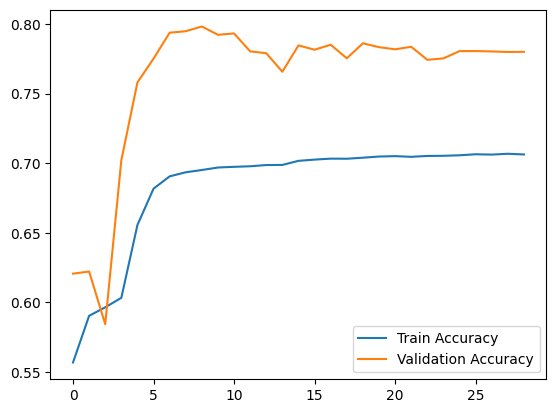

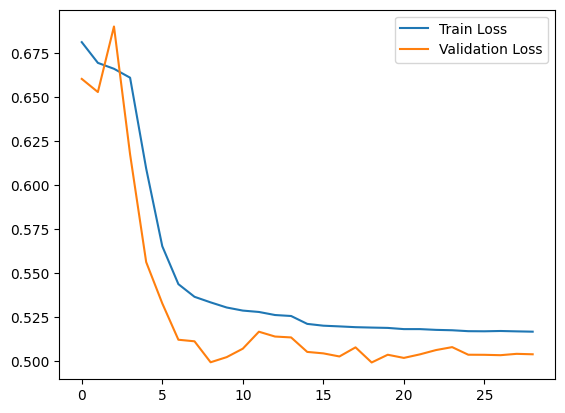

2659/2659 [==============================] - 23s 8ms/step
              precision    recall  f1-score   support

           0       0.78      0.95      0.86     57574
           1       0.81      0.44      0.57     27487

    accuracy                           0.79     85061
   macro avg       0.80      0.70      0.71     85061
weighted avg       0.79      0.79      0.76     85061

[[54748  2826]
 [15369 12118]]


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Selecionando apenas as colunas relacionadas aos meses (ajuste para incluir até 36 meses)
mes_cols = [f'MES_{i}' for i in range(1, 37)]  # MES_1 a MES_36
X_months = X[mes_cols]
X_ext_months = X_ext[mes_cols]

# Pré-processamento dos dados (normalização)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_months)
X_ext_scaled = scaler.transform(X_ext_months)  # Usar transform aqui para evitar data leakage

# Redimensionando os dados para incluir a dimensão temporal (36 meses)
X_scaled_reshaped = X_scaled.reshape((X_scaled.shape[0], 36, 1))  # Redimensionando para 36 períodos temporais (1 característica por mês)
X_ext_scaled_reshaped = X_ext_scaled.reshape((X_ext_scaled.shape[0], 36, 1))

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled_reshaped, y, test_size=0.3, random_state=42)
X_ext_train, X_ext_test, y_ext_train, y_ext_test = train_test_split(X_ext_scaled_reshaped, y_ext, test_size=0.3, random_state=42)

# Aplicando o RandomOverSampler para balanceamento
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1]))  # Removendo a última dimensão temporariamente
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train_reshaped, y_train)

# Redimensionando novamente para incluir a dimensão temporal (36 meses)
X_train_balanced_reshaped = X_train_balanced.reshape((X_train_balanced.shape[0], 36, 1))

# Definindo o modelo RNN com LSTM
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(X_train_balanced_reshaped.shape[1], X_train_balanced_reshaped.shape[2])))
    model.add(Dropout(0.3))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # Compilando o modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Criando o modelo
model = create_lstm_model()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Treinamento do modelo com os dados balanceados
history = model.fit(X_train_balanced_reshaped, y_train_balanced, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stop, reduce_lr])

# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Exibindo resultados do treinamento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Prevendo com o modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Relatório de classificação
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Testando novos modelos - RNNs


Epoch 1/100
6203/6203 [==============================] - 174s 28ms/step - loss: 0.6223 - accuracy: 0.6789 - val_loss: 0.6137 - val_accuracy: 0.6820 - lr: 0.0010
Epoch 2/100
6203/6203 [==============================] - 173s 28ms/step - loss: 0.6121 - accuracy: 0.6818 - val_loss: 0.6082 - val_accuracy: 0.6860 - lr: 0.0010
Epoch 3/100
6203/6203 [==============================] - 164s 27ms/step - loss: 0.6081 - accuracy: 0.6836 - val_loss: 0.6080 - val_accuracy: 0.6854 - lr: 0.0010
Epoch 4/100
6203/6203 [==============================] - 171s 28ms/step - loss: 0.6064 - accuracy: 0.6852 - val_loss: 0.6035 - val_accuracy: 0.6910 - lr: 0.0010
Epoch 5/100
6203/6203 [==============================] - 173s 28ms/step - loss: 0.6043 - accuracy: 0.6867 - val_loss: 0.6026 - val_accuracy: 0.6892 - lr: 0.0010
Epoch 6/100
6203/6203 [==============================] - 168s 27ms/step - loss: 0.6029 - accuracy: 0.6881 - val_loss: 0.5996 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 7/100
6203/6203 [===========

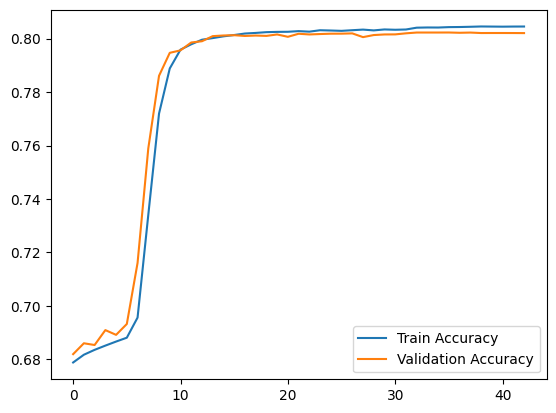

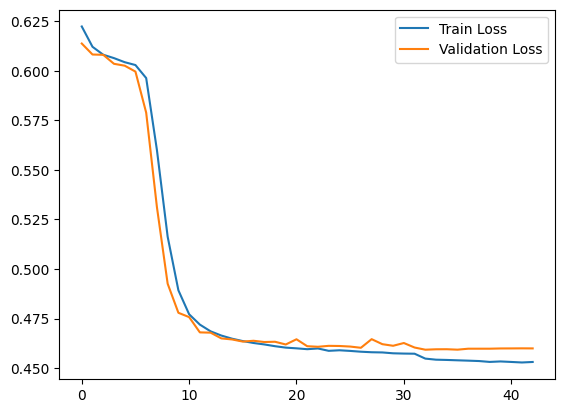

2659/2659 [==============================] - 23s 9ms/step
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     57574
           1       1.00      0.39      0.56     27487

    accuracy                           0.80     85061
   macro avg       0.89      0.69      0.72     85061
weighted avg       0.85      0.80      0.77     85061

[[57539    35]
 [16783 10704]]


In [ ]:
# Selecionando apenas as colunas relacionadas aos meses
mes_cols = [f'MES_{i}' for i in range(1, 37)]  # MES_1 a MES_36
X_months = X[mes_cols]
X_ext_months = X_ext[mes_cols]

# Pré-processamento dos dados (normalização)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_months)
X_ext_scaled = scaler.fit_transform(X_ext_months)

# Redimensionando os dados para incluir a dimensão temporal (36 meses)
X_scaled_reshaped = X_scaled.reshape((X_scaled.shape[0], 36, 1))  # Redimensionando para 36 períodos temporais (1 característica por mês)
X_ext_scaled_reshaped = X_ext_scaled.reshape((X_ext_scaled.shape[0], 36, 1))

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled_reshaped, y, test_size=0.3, random_state=42)
X_ext_train, X_ext_test, y_ext_train, y_ext_test = train_test_split(X_ext_scaled_reshaped, y_ext, test_size=0.3, random_state=42)

# Definindo o modelo RNN com LSTM
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.3))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # Compilando o modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Criando o modelo
model = create_lstm_model()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Treinamento do modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stop, reduce_lr])

# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Exibindo resultados do treinamento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Prevendo com o modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Relatório de classificação
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

2659/2659 [==============================] - 22s 8ms/step


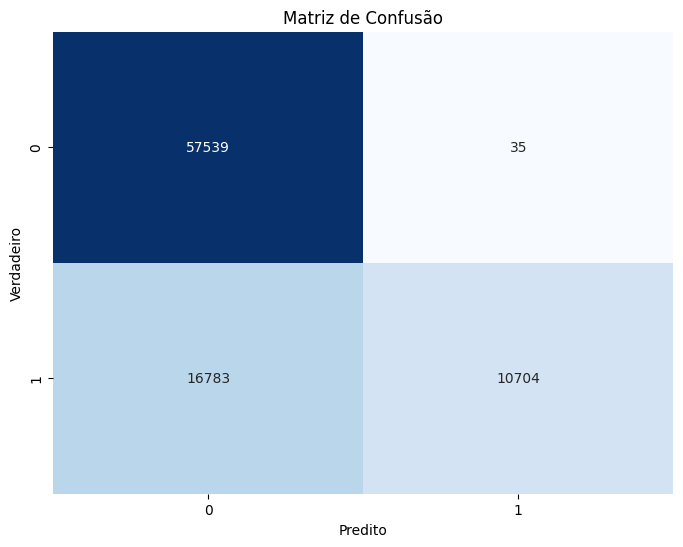

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prevendo com o modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convertendo probabilidades em classes binárias

# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()